# Did the woman have at least one affair?

In [1]:
#Code to loading data and modules: 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from patsy import dmatrices

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dta = sm.datasets.fair.load_pandas().data 
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


The dataset contains 6366 observations of 9 variables:
#rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)
#age: woman's age
#yrs_married: number of years married
#children: number of children
#religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)
#educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

#occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
#occupation_husb: husband's occupation (same coding as above)
#affairs: time spent in extra-marital affairs

In [3]:
#Adding one binary column affairs, 1--represents having affair, 0 ---represents Not having Affair
dta['affair']=(dta['affairs']>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 

In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It can be seen that increase in age and years of marriage and no of children correlates with  a declining marriage rate

# Data Visualization

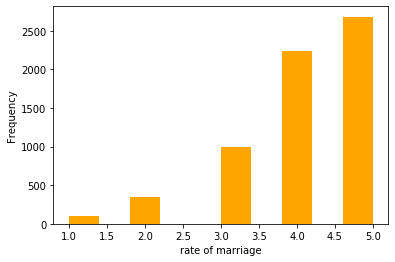

In [6]:
#marriage Rating with those wh have affair and those who dont have affair
plt.hist(dta['rate_marriage'],color='orange')
plt.xlabel("rate of marriage")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

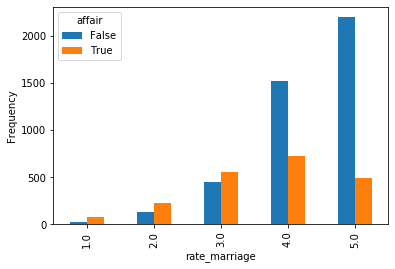

In [7]:
#marriage Rate
pd.crosstab(dta['rate_marriage'], dta['affair'].astype(bool)).plot(kind='bar')
plt.ylabel("Frequency")

# Preparing data for logistic regression

To prepare the data, I will add an intercept column as well as dummy variables for occupation and occupation_husb, since I am treating them as categorial variables

In [8]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',data=dta, return_type="dataframe")
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [10]:
#Renaming the columns in X for better understanding

X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [11]:
#Flattening y into a 1-D array, so that scikit-learn will properly understand it as the response variable.
y=np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
#Logisticr Regression for the whole data
full_lr=LogisticRegression()
full_lr.fit(X,y)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Accuracy on the training set
full_lr.score(X,y)

0.7258875274897895

In [14]:
#Examine the coefficients
pd.DataFrame((full_lr.coef_).flatten(), index=X.columns)

,0
Intercept,1.489884
occ_2,0.188046
occ_3,0.498926
occ_4,0.250647
occ_5,0.838983
occ_6,0.833921
occ_husb_2,0.190547
occ_husb_3,0.297745
occ_husb_4,0.161319
occ_husb_5,0.187683


From the above output it can be seen-Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive

In [15]:
#We trained and tested the model on same data, lets see what happens if we split the data and train and then test it

In [16]:
#Splitting the data into train and test data
X_train, X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=46)

In [17]:
#Train the model using train data
train_model=LogisticRegression()
train_model.fit(X_train,Y_train)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
Y_pred=train_model.predict(X_test)
print(Y_pred)
Y_probs=train_model.predict_proba(X_test)
print(Y_probs)

[0. 0. 0. ... 0. 0. 0.]
[[0.55725867 0.44274133]
 [0.70056546 0.29943454]
 [0.82331365 0.17668635]
 ...
 [0.87230739 0.12769261]
 [0.56075964 0.43924036]
 [0.85488679 0.14511321]]


In [19]:
#Model accuracy
print("Accuracy_Score",metrics.accuracy_score(Y_test,Y_pred))
print("ROC_AUC_Score",metrics.roc_auc_score(Y_test,Y_probs[: ,1]))

Accuracy_Score 0.7261780104712042
ROC_AUC_Score 0.7414208438698099


The accuracy is 72-74%, which is the same as we experienced when training and predicting on the same data.

In [23]:
#Confusion Matrix and Classification report
#("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test,Y_pred))
#print("Classification Report:")
print(metrics.classification_report(Y_test,Y_pred))

[[1159  153]
 [ 370  228]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      1312
         1.0       0.60      0.38      0.47       598

    accuracy                           0.73      1910
   macro avg       0.68      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



The accuracy is 72-74%, which is the same as we experienced before 

In [24]:
#model evaluation Using Cross validation
scores=cross_val_score(LogisticRegression(), X,y,scoring='accuracy',cv=5)
print(scores)
print(scores.mean())

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.71271586 0.72291994 0.71899529 0.71855346 0.75157233]
0.7249513738732067


C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is 72-74%, which is the same as we experienced without using Cross validation